University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence<p>   
## Assignment: Organising a Colour Palette 
## Student number: 2626628   

# Reading the data file 

In [2]:
import numpy as np      # Numerical library, used keeing the list of colours and computing the Euclidean distance

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

#### Data file: 100 colours dataset

The colorus are stored in a list, where each element of the list is a numpy array of dimension 3. That is arrays of 3 real numbers where the real numbers indicate the R,G, and B values of the colour (RGB colour model). 

In [3]:
ncolors, colors = read_data("col100.txt")

print(f'Number of colours: {ncolors}')
print("First 5 colours:")
print(colors[0:5,  :])

Number of colours: 100
First 5 colours:
[[0.96645354 0.4407326  0.00749147]
 [0.91097596 0.939269   0.58222757]
 [0.67156348 0.08393823 0.76648093]
 [0.23680978 0.03081402 0.78877272]
 [0.34608897 0.62328148 0.6158157 ]]


### Plotting a sequence of colours

The function <b>plot_colors()</b> displaysthe colours from the color list *col_list* the order given by the *col_order* list. 

*col_list* and *col_order* need to be of the same length. The *ratio* parameter indicates height/width proportion of each bar of colour in the plot.

In [4]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

# Multi-start hill-climbing algorithm
### Description
I have chosen the next available neighbour and calculated the Euclidean distance and used swapping and shuffling. Euclidean distance is the only metric that is the same in all direction, that is, rotation invariant. This fits very nicely with the general qualities of our universe, which is also rotation invariant.

In [5]:
import random as rnd

# Function to generate a random solution (random ordering)  - we can generate a random ordering of the list by using
# the shuffle function from the random library
def random_sol():
    sol = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
    # Shuffle the elements in the list randomly. Shuffles in place and doesn’t retunr a value
    rnd.shuffle(sol)   
    return sol

# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])


### Generating Random initial Solution as Createpoint

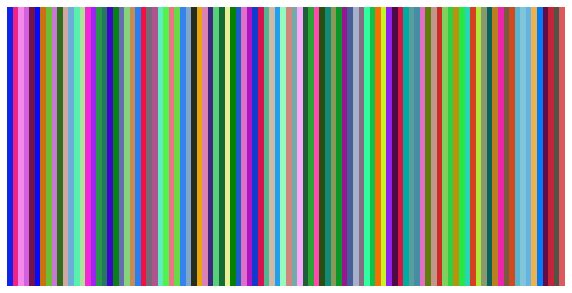

Evaluation of order1: 64.82303918317746
Evaluation of order1: 64.823


In [6]:
order = random_sol() # First Stage of Hill

e2 = evaluate(colors, order)
plot_colors(colors, order, ratio=50)  
print(f'Evaluation of order1: {e2}') # Displaying all decimals
print(f'Evaluation of order1: {np.round(e2,4)}') # rounding to display only 4 decimals. This is better for display

### Description
After initial random sequence generation we have our bottom of the hill solution. in order to develop from there we have decided to keep a threshold value to make our algorithm run to generate best possible outcome.

64.82303918317746
Best Output occurs after  1  Stages
Best Distance --->  62.82612654973187


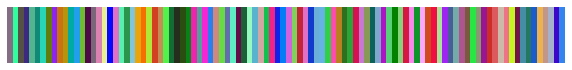

Best Output occurs after  16  Stages
Best Distance --->  62.61266824881166


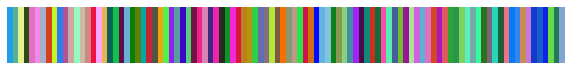

Best Output occurs after  22  Stages
Best Distance --->  59.538147890198424


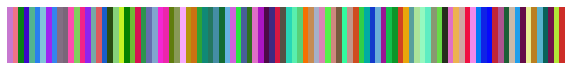

Best Output occurs after  56  Stages
Best Distance --->  58.173209718976736


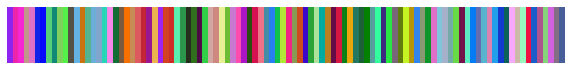

Best Output occurs after  730  Stages
Best Distance --->  57.975573059788914


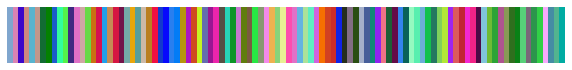

Best Output occurs after  763  Stages
Best Distance --->  57.77873073417114


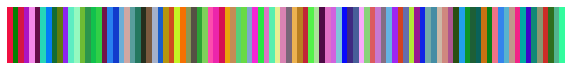

Best Output occurs after  1412  Stages
Best Distance --->  57.60130213291636


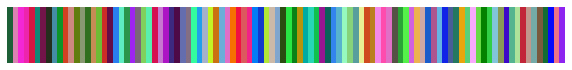

KeyboardInterrupt: 

In [7]:
Threshold = e2
print(e2)
temp = 1000
numberOfSteps = 0
while(1):
    for i in range(int(len(order)/2)):
        x = int(rnd.random()*100) # Random indexing
        y = int(rnd.random()*100) # Random indexing
        order[x],order[y] = order[y],order[x] # Swapping
    rnd.shuffle(order) # Shuffle indexes
    e = evaluate(colors, order) # ecludian distance 
    numberOfSteps +=1
    if e <Threshold: # Threshold
        if e >= temp:
            continue
        temp = e
        print("Best Output occurs after ", numberOfSteps, " Stages")
        print("Best Distance ---> ", e)
        mhc_best100 = order # Best100 output order will be saved here
        plot_colors(colors, order, ratio=10)  
        

#### Data file: 500 colours dataset

The colorus are stored in a list, where each element of the list is a numpy array of dimension 3. That is arrays of 3 real numbers where the real numbers indicate the R,G, and B values of the colour (RGB colour model).

In [8]:
ncolors, colors = read_data("col500.txt")

print(f'Number of colours: {ncolors}')
print("First 5 colours:")
print(colors[0:5,  :])

Number of colours: 500
First 5 colours:
[[0.96645354 0.4407326  0.00749147]
 [0.91097596 0.939269   0.58222757]
 [0.67156348 0.08393823 0.76648093]
 [0.23680978 0.03081402 0.78877272]
 [0.34608897 0.62328148 0.6158157 ]]


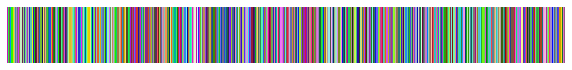

Evaluation of order1: 320.94671894797875
Evaluation of order1: 320.9467


In [9]:
order = random_sol() # First Stage of Hill

e2 = evaluate(colors, order)
plot_colors(colors, order, ratio=50)  
print(f'Evaluation of order1: {e2}') # Displaying all decimals
print(f'Evaluation of order1: {np.round(e2,4)}') # rounding to display only 4 decimals. This is better for display

In [ ]:
Threshold = e2
print(e2)
temp = 1000
numberOfSteps = 0
while(1):
    for i in range(int(len(order)/2)):
        x = int(rnd.random()*100) # Random indexing
        y = int(rnd.random()*100) # Random indexing
        order[x],order[y] = order[y],order[x] # Swapping
    rnd.shuffle(order) # Shuffle indexes
    e = evaluate(colors, order) # ecludian distance 
    numberOfSteps +=1
    if e <Threshold: # Threshold
        if e >= temp:
            continue
        temp = e
        print("Best Output occurs after ", numberOfSteps, " Stages")
        print("Best Distance ---> ", e)
        mhc_best500 = order # Best500 output order will be saved here
        plot_colors(colors, order, ratio=10)  

320.94671894797875
Best Output occurs after  9  Stages
Best Distance --->  320.82631987082203


Best Output occurs after  26  Stages
Best Distance --->  319.8904746482593


Best Output occurs after  39  Stages
Best Distance --->  317.7439844237381


Best Output occurs after  46  Stages
Best Distance --->  317.6272655830926


Best Output occurs after  73  Stages
Best Distance --->  307.8591756681733


Best Output occurs after  8742  Stages
Best Distance --->  306.77983342372534


Best Output occurs after  39797  Stages
Best Distance --->  306.3039644613421


Best Output occurs after  90859  Stages
Best Distance --->  305.6198472188737


Best Output occurs after  99515  Stages
Best Distance --->  304.32063247963043


Best Output occurs after  140657  Stages
Best Distance --->  303.5593377837521


### Threshold of color pallette is decided with the help of ecludien distance. Since the solution approach is random (swaping, shuffling) iteraions of algorithm is not constant.